##  Datetime

In [1]:
import pandas as pd
import datetime as dt
import re
from pathlib import Path

# Current dir
# CURR_DIR = Path().absolute()
BASE_DIR = Path().absolute().parents[0]
input_files_dir = Path.joinpath(BASE_DIR, 'Data')

In [2]:
someday = dt.date(2022, 1, 26)
someday

datetime.date(2022, 1, 26)

In [3]:
someday.year

2022

In [4]:
someday.day

26

In [5]:
# Daefault midnight
dt.datetime(2022, 1, 26)

datetime.datetime(2022, 1, 26, 0, 0)

In [6]:
someday = dt.datetime(2022, 1, 26, 18, 13, 57)

In [7]:
someday.day
someday.hour

18

## pandas timestamp object

In [8]:
x = '2022-01-26 18:13:57'

In [9]:
pd.Timestamp(x)

Timestamp('2022-01-26 18:13:57')

In [10]:
# Careful about below assumption
x = pd.Timestamp('13/1/2022')

In [11]:
x.day

13

In [12]:
x = pd.Timestamp('12/1/2022')

In [13]:
x.day

1

In [14]:
x = pd.Timestamp('1/13/2022')

In [15]:
x.day

13

In [16]:
# am/pm to 24 hr
pd.Timestamp('2022-01-26 8:13:57 pm')

Timestamp('2022-01-26 20:13:57')

In [17]:
# timestamp pandas - more features
# datetime default
pd.Timestamp(dt.datetime(2022, 1, 26, 16, 35,25))

Timestamp('2022-01-26 16:35:25')

## DatetimeIndex object

In [18]:
dates = ['2022-01-26', '2022-01-27', '2022-01-28']
dtindex = pd.DatetimeIndex(dates)
dtindex

DatetimeIndex(['2022-01-26', '2022-01-27', '2022-01-28'], dtype='datetime64[ns]', freq=None)

In [19]:
dates = ['2022/01/26', '2022-01/27', '2022-01-28']
pd.DatetimeIndex(dates)

DatetimeIndex(['2022-01-26', '2022-01-27', '2022-01-28'], dtype='datetime64[ns]', freq=None)

In [20]:
values = [100, 200, 300]
pd.Series(data=values, index=dtindex)

2022-01-26    100
2022-01-27    200
2022-01-28    300
dtype: int64

## pd.to_datetime()

In [21]:
import pandas as pd

In [22]:
# convert existing obj into pandas time obj


In [23]:
pd.to_datetime('2022-01-26')

Timestamp('2022-01-26 00:00:00')

In [24]:
pd.to_datetime('2022-01-26 8:12:35 pm')

Timestamp('2022-01-26 20:12:35')

In [25]:
dates = ['2022/01/26', '2022-01/27', '2022-01-28', 'January 29th, 2022', '2021']
pd.to_datetime(dates)

DatetimeIndex(['2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2021-01-01'],
              dtype='datetime64[ns]', freq=None)

In [26]:
times = pd.Series(dates)
times

0            2022/01/26
1            2022-01/27
2            2022-01-28
3    January 29th, 2022
4                  2021
dtype: object

In [27]:
# dtype: object to dtype: datetime64[ns]
pd.to_datetime(times)

0   2022-01-26
1   2022-01-27
2   2022-01-28
3   2022-01-29
4   2021-01-01
dtype: datetime64[ns]

In [28]:
# it is not perfect when data is bad (i.e messed up)

In [29]:
dates1 = pd.Series(['Hello', '2022/01/26', '2022/01/27', '28-01-2022', 'January 29th, 2022'])
dates1

0                 Hello
1            2022/01/26
2            2022/01/27
3            28-01-2022
4    January 29th, 2022
dtype: object

In [30]:
# erroe handing
pd.to_datetime(dates1, errors= 'coerce')

C:\Users\naruto\AppData\Local\Temp\ipykernel_3084\2502315880.py:2: UserWarning: Parsing '28-01-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  pd.to_datetime(dates1, errors= 'coerce')


0          NaT
1   2022-01-26
2   2022-01-27
3   2022-01-28
4   2022-01-29
dtype: datetime64[ns]

In [31]:
# unix time seconds - [1349720105, 1349806505, 1350065705]
pd.to_datetime([1349720105, 1349806505, 1350065705], unit='s')

DatetimeIndex(['2012-10-08 18:15:05', '2012-10-09 18:15:05',
               '2012-10-12 18:15:05'],
              dtype='datetime64[ns]', freq=None)

## Range of Dates pd.date_range() Method part 1

In [32]:
# freq='D' Days Default 1 Day
times = pd.date_range(start='2022-01-26', end='2022-02-4', freq='D')
times

DatetimeIndex(['2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', freq='D')

In [33]:
times[0]

Timestamp('2022-01-26 00:00:00', freq='D')

In [34]:
type(times[0])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
# freq='2D' 2 Days
times = pd.date_range(start='2022-01-26', end='2022-02-4', freq='2D')
times

DatetimeIndex(['2022-01-26', '2022-01-28', '2022-01-30', '2022-02-01',
               '2022-02-03'],
              dtype='datetime64[ns]', freq='2D')

In [36]:
# freq='B' Business days
times = pd.date_range(start='2022-01-26', end='2022-02-4', freq='B')
times

DatetimeIndex(['2022-01-26', '2022-01-27', '2022-01-28', '2022-01-31',
               '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', freq='B')

In [37]:
# freq='W' Week
times = pd.date_range(start='2022-01-26', end='2022-02-4', freq='W')
times

DatetimeIndex(['2022-01-30'], dtype='datetime64[ns]', freq='W-SUN')

In [38]:
# freq='W-FRI' start Week friday
times = pd.date_range(start='2022-01-26', end='2022-02-4', freq='W-FRI')
times

DatetimeIndex(['2022-01-28', '2022-02-04'], dtype='datetime64[ns]', freq='W-FRI')

In [39]:
# freq='H' Hour
times = pd.date_range(start='2022-01-26', end='2022-02-4', freq='H')
times

DatetimeIndex(['2022-01-26 00:00:00', '2022-01-26 01:00:00',
               '2022-01-26 02:00:00', '2022-01-26 03:00:00',
               '2022-01-26 04:00:00', '2022-01-26 05:00:00',
               '2022-01-26 06:00:00', '2022-01-26 07:00:00',
               '2022-01-26 08:00:00', '2022-01-26 09:00:00',
               ...
               '2022-02-03 15:00:00', '2022-02-03 16:00:00',
               '2022-02-03 17:00:00', '2022-02-03 18:00:00',
               '2022-02-03 19:00:00', '2022-02-03 20:00:00',
               '2022-02-03 21:00:00', '2022-02-03 22:00:00',
               '2022-02-03 23:00:00', '2022-02-04 00:00:00'],
              dtype='datetime64[ns]', length=217, freq='H')

In [40]:
# freq='6H' 6Hour
times = pd.date_range(start='2022-01-26', end='2022-02-4', freq='6H')
times

DatetimeIndex(['2022-01-26 00:00:00', '2022-01-26 06:00:00',
               '2022-01-26 12:00:00', '2022-01-26 18:00:00',
               '2022-01-27 00:00:00', '2022-01-27 06:00:00',
               '2022-01-27 12:00:00', '2022-01-27 18:00:00',
               '2022-01-28 00:00:00', '2022-01-28 06:00:00',
               '2022-01-28 12:00:00', '2022-01-28 18:00:00',
               '2022-01-29 00:00:00', '2022-01-29 06:00:00',
               '2022-01-29 12:00:00', '2022-01-29 18:00:00',
               '2022-01-30 00:00:00', '2022-01-30 06:00:00',
               '2022-01-30 12:00:00', '2022-01-30 18:00:00',
               '2022-01-31 00:00:00', '2022-01-31 06:00:00',
               '2022-01-31 12:00:00', '2022-01-31 18:00:00',
               '2022-02-01 00:00:00', '2022-02-01 06:00:00',
               '2022-02-01 12:00:00', '2022-02-01 18:00:00',
               '2022-02-02 00:00:00', '2022-02-02 06:00:00',
               '2022-02-02 12:00:00', '2022-02-02 18:00:00',
               '2022-02-

In [41]:
# freq='M' last day of month Month
times = pd.date_range(start='2022-01-26', end='2022-02-4', freq='M')
times

DatetimeIndex(['2022-01-31'], dtype='datetime64[ns]', freq='M')

In [42]:
# freq='MS' Month start
times = pd.date_range(start='2022-01-26', end='2022-02-4', freq='MS')
times

DatetimeIndex(['2022-02-01'], dtype='datetime64[ns]', freq='MS')

In [43]:
# freq='A' last day of each tear
times = pd.date_range(start='2022-01-26', end='2050-02-4', freq='A')
times

DatetimeIndex(['2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

## Range of Dates pd.date_range() Method part 2

In [44]:
# 25 datesfrom start date
pd.date_range(start='2022-01-26', periods=25, freq='D')

DatetimeIndex(['2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06',
               '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10',
               '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14',
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-19'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# 25 business days
pd.date_range(start='2022-01-26', periods=25, freq='B')

DatetimeIndex(['2022-01-26', '2022-01-27', '2022-01-28', '2022-01-31',
               '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10',
               '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-21', '2022-02-22',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-28',
               '2022-03-01'],
              dtype='datetime64[ns]', freq='B')

In [46]:
pd.date_range(end='2022-01-26', periods=25, freq='D')

DatetimeIndex(['2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17',
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
               '2022-01-26'],
              dtype='datetime64[ns]', freq='D')

## .dt Accessor

In [47]:
bunch_of_dates = pd.date_range(start='2000-01-01', end='2010-12-31', freq='24D')

In [48]:
s = pd.Series(bunch_of_dates)
s

0     2000-01-01
1     2000-01-25
2     2000-02-18
3     2000-03-13
4     2000-04-06
         ...    
163   2010-09-17
164   2010-10-11
165   2010-11-04
166   2010-11-28
167   2010-12-22
Length: 168, dtype: datetime64[ns]

In [49]:
s.dt.day

0       1
1      25
2      18
3      13
4       6
       ..
163    17
164    11
165     4
166    28
167    22
Length: 168, dtype: int64

In [50]:
s.dt.day_name()

0       Saturday
1        Tuesday
2         Friday
3         Monday
4       Thursday
         ...    
163       Friday
164       Monday
165     Thursday
166       Sunday
167    Wednesday
Length: 168, dtype: object

In [51]:
s.dt.is_quarter_start

0       True
1      False
2      False
3      False
4      False
       ...  
163    False
164    False
165    False
166    False
167    False
Length: 168, dtype: bool

In [52]:
s[s.dt.is_quarter_start]

0     2000-01-01
19    2001-04-01
38    2002-07-01
137   2009-01-01
dtype: datetime64[ns]

In [53]:
s[s.dt.is_month_end]

5     2000-04-30
57    2003-09-30
71    2004-08-31
90    2005-11-30
123   2008-01-31
161   2010-07-31
dtype: datetime64[ns]

## datareader - used to be a library in padas but split apart (live data like yahoo finance,stock)

In [58]:
# ! pip install pandas-datareader

In [59]:
# conda info --envs
# conda activate env_name
# conda install pandas-datareader

In [61]:
import pandas as pd
import datetime as dt
from pandas_datareader import data

##  adding/sub time - `pd.DateOffset` object

In [62]:
amazon_egp_df = pd.read_csv(Path.joinpath(input_files_dir, 'amazon_egp.csv'), parse_dates=['Report Date', 'Timestamp', 'Extract Date'])

In [63]:
amazon_egp_df.head(2)

,Report Date,Country,Prouduct Barcode,Flipkart ProductID,Flipkart ProductName,Category Level1,Category Level2,Category Level3,Category Level4,Site,...,Category from site1,Category from site2,Category from site3,Category from site4,Category from site5,Category from site6,Fulfillment,Extra2,Extra3,Extra4
0,2021-12-03,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon.eg,...,Electronics,"Home Theater"","" TV & Video",TVs,NaN,NaN,NaN,NaN,Valid URLs OOS (Without price),150_EGYPT_Amazon.eg,NaN
1,2021-12-03,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon.eg,...,Electronics,"Home Theater"","" TV & Video",TVs,NaN,NaN,NaN,NaN,Valid URLs OOS (Without price),1_EGYPT_Amazon.eg,NaN


In [64]:
amazon_egp_df['Timestamp'] + pd.DateOffset(days=5)

0     2021-12-08 11:01:00
1     2021-12-08 11:03:00
2     2021-12-08 11:03:00
3     2021-12-08 11:03:00
4     2021-12-08 11:03:00
              ...        
750   2021-12-08 11:04:00
751   2021-12-08 11:04:00
752   2021-12-08 11:04:00
753   2021-12-08 11:04:00
754   2021-12-08 11:04:00
Name: Timestamp, Length: 755, dtype: datetime64[ns]

In [65]:
amazon_egp_df['Timestamp'][:3]

0   2021-12-03 11:01:00
1   2021-12-03 11:03:00
2   2021-12-03 11:03:00
Name: Timestamp, dtype: datetime64[ns]

In [66]:
amazon_egp_df['Timestamp'] - pd.DateOffset(days=1, hours=1)

0     2021-12-02 10:01:00
1     2021-12-02 10:03:00
2     2021-12-02 10:03:00
3     2021-12-02 10:03:00
4     2021-12-02 10:03:00
              ...        
750   2021-12-02 10:04:00
751   2021-12-02 10:04:00
752   2021-12-02 10:04:00
753   2021-12-02 10:04:00
754   2021-12-02 10:04:00
Name: Timestamp, Length: 755, dtype: datetime64[ns]

In [67]:
amazon_egp_df['Timestamp'] - pd.DateOffset(weeks=4)

0     2021-11-05 11:01:00
1     2021-11-05 11:03:00
2     2021-11-05 11:03:00
3     2021-11-05 11:03:00
4     2021-11-05 11:03:00
              ...        
750   2021-11-05 11:04:00
751   2021-11-05 11:04:00
752   2021-11-05 11:04:00
753   2021-11-05 11:04:00
754   2021-11-05 11:04:00
Name: Timestamp, Length: 755, dtype: datetime64[ns]

In [68]:
amazon_egp_df['Timestamp'] - pd.DateOffset(years=1, months=1, days=2, hours=2, minutes=2, seconds=1)

0     2020-11-01 08:58:59
1     2020-11-01 09:00:59
2     2020-11-01 09:00:59
3     2020-11-01 09:00:59
4     2020-11-01 09:00:59
              ...        
750   2020-11-01 09:01:59
751   2020-11-01 09:01:59
752   2020-11-01 09:01:59
753   2020-11-01 09:01:59
754   2020-11-01 09:01:59
Name: Timestamp, Length: 755, dtype: datetime64[ns]

## Timeseries Offset - Useful for business month end and begin (Mon-Fri)

In [69]:
# dynamic amount of time - change multiple date set to perticular value

In [70]:
# but if date is already last date it won't keep last date as it is already pass. it change to next month
# if sub it goes to backword month for last date only
# Similar in MonthBegin
amazon_egp_df['Timestamp'] + pd.tseries.offsets.MonthEnd()

0     2021-12-31 11:01:00
1     2021-12-31 11:03:00
2     2021-12-31 11:03:00
3     2021-12-31 11:03:00
4     2021-12-31 11:03:00
              ...        
750   2021-12-31 11:04:00
751   2021-12-31 11:04:00
752   2021-12-31 11:04:00
753   2021-12-31 11:04:00
754   2021-12-31 11:04:00
Name: Timestamp, Length: 755, dtype: datetime64[ns]

In [71]:
# Best way you can import offsets
from pandas.tseries import offsets

In [72]:
amazon_egp_df['Timestamp'] + offsets.BMonthBegin()

0     2022-01-03 11:01:00
1     2022-01-03 11:03:00
2     2022-01-03 11:03:00
3     2022-01-03 11:03:00
4     2022-01-03 11:03:00
              ...        
750   2022-01-03 11:04:00
751   2022-01-03 11:04:00
752   2022-01-03 11:04:00
753   2022-01-03 11:04:00
754   2022-01-03 11:04:00
Name: Timestamp, Length: 755, dtype: datetime64[ns]

In [73]:
amazon_egp_df['Timestamp'] + offsets.BMonthEnd()

0     2021-12-31 11:01:00
1     2021-12-31 11:03:00
2     2021-12-31 11:03:00
3     2021-12-31 11:03:00
4     2021-12-31 11:03:00
              ...        
750   2021-12-31 11:04:00
751   2021-12-31 11:04:00
752   2021-12-31 11:04:00
753   2021-12-31 11:04:00
754   2021-12-31 11:04:00
Name: Timestamp, Length: 755, dtype: datetime64[ns]

## Timedelta object

In [74]:
# difference btwn 2 times
# years parameter wont work here

In [75]:
time_a = pd.Timestamp('2022-01-29 16:57:50')
time_b = pd.Timestamp('2022-01-28 17:50:00')
time_a - time_b

Timedelta('0 days 23:07:50')

In [76]:
time_b - time_a

Timedelta('-1 days +00:52:10')

In [77]:
# calculate time after specific timespan

In [78]:
# set time 3 days 2hours
time_x = pd.Timedelta(days=3, hours=2)

In [79]:
time_b + time_x

Timestamp('2022-01-31 19:50:00')

In [80]:
time_z = pd.Timedelta(weeks=2, days=3, hours=2, minutes=12)

In [81]:
time_b + time_z

Timestamp('2022-02-14 20:02:00')

### String conversion to time

In [82]:
pd.Timedelta('6 hours 3 minutes')

Timedelta('0 days 06:03:00')

In [83]:
pd.Timedelta('14 days 6 hours 9 minutes46 seconds')

Timedelta('14 days 06:09:46')

## Timedelta in dataset

In [85]:
shipping = pd.read_csv(Path.joinpath(input_files_dir, 'ecommerce.csv'), index_col='ID', parse_dates=['order_date', 'delivery_date'])

In [86]:
shipping.head(3)

,order_date,delivery_date
ID,,
1,1998-05-24,1999-02-05
2,1992-04-22,1998-03-06
4,1991-02-10,1992-08-26


In [87]:
shipping['delivery_time'] = shipping['delivery_date'] - shipping['order_date']

In [88]:
shipping.head(3)

,order_date,delivery_date,delivery_time
ID,,,
1,1998-05-24,1999-02-05,257 days
2,1992-04-22,1998-03-06,2144 days
4,1991-02-10,1992-08-26,563 days


In [89]:
shipping['delivery_time'] + shipping['delivery_date']

ID
1     1999-10-20
2     2004-01-18
4     1994-03-12
5     2003-03-22
7     2003-03-18
         ...    
990   2000-09-12
991   2004-10-18
993   2005-10-06
994   1993-06-23
997   1993-07-01
Length: 501, dtype: datetime64[ns]

In [90]:
shipping[shipping['delivery_time'] < '20 days']

,order_date,delivery_date,delivery_time
ID,,,
19,1998-05-10,1998-05-19,9 days
310,1997-09-20,1997-10-06,16 days
612,1994-08-11,1994-08-20,9 days
730,1992-12-10,1992-12-28,18 days
898,1990-05-24,1990-06-01,8 days
994,1993-06-03,1993-06-13,10 days


In [91]:
shipping[shipping['delivery_time'] <= '25 days']

,order_date,delivery_date,delivery_time
ID,,,
19,1998-05-10,1998-05-19,9 days
88,1997-08-29,1997-09-19,21 days
310,1997-09-20,1997-10-06,16 days
484,1993-08-30,1993-09-22,23 days
612,1994-08-11,1994-08-20,9 days
659,1998-10-11,1998-11-03,23 days
730,1992-12-10,1992-12-28,18 days
898,1990-05-24,1990-06-01,8 days
994,1993-06-03,1993-06-13,10 days


In [92]:
shipping['delivery_time'].min()

Timedelta('8 days 00:00:00')

In [93]:
shipping['delivery_time'].max()

Timedelta('3583 days 00:00:00')

## Input and Output in pandas

### pass a URL to `pd.read_csv` method

In [94]:
url = 'https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv'
baby_names = pd.read_csv(url)

### Object conversion to vanila python obj

In [95]:
baby_names["Child's First Name"].to_frame()

,Child's First Name
0,GERALDINE
1,GIA
2,GIANNA
3,GISELLE
4,GRACE
...,...
49504,Nala
49505,Royalty
49506,Sariyah
49507,Simone


In [96]:
baby_names["Child's First Name"].tolist()

['GERALDINE',
 'GIA',
 'GIANNA',
 'GISELLE',
 'GRACE',
 'GUADALUPE',
 'HAILEY',
 'HALEY',
 'HANNAH',
 'HAYLEE',
 'HAYLEY',
 'HAZEL',
 'HEAVEN',
 'HEIDI',
 'HEIDY',
 'HELEN',
 'IMANI',
 'INGRID',
 'IRENE',
 'IRIS',
 'ISABEL',
 'ISABELA',
 'ISABELLA',
 'ISABELLE',
 'ISIS',
 'ITZEL',
 'IZABELLA',
 'JACQUELINE',
 'JADA',
 'JADE',
 'JAELYNN',
 'JAMIE',
 'JANELLE',
 'JASLENE',
 'JASMIN',
 'JASMINE',
 'JAYDA',
 'JAYLA',
 'JAYLAH',
 'JAYLEEN',
 'JAYLENE',
 'JAYLIN',
 'JAYLYN',
 'JAZLYN',
 'JAZMIN',
 'JAZMINE',
 'JENNIFER',
 'JESSICA',
 'JIMENA',
 'JOCELYN',
 'JOHANNA',
 'JOSELYN',
 'JULIA',
 'JULIANA',
 'JULIANNA',
 'JULIET',
 'JULIETTE',
 'JULISSA',
 'KAELYN',
 'KAILEY',
 'KAILYN',
 'KAITLYN',
 'KAMILA',
 'KAREN',
 'KARLA',
 'KATE',
 'KATELYN',
 'KATELYNN',
 'KATHERINE',
 'KATIE',
 'KAYLA',
 'KAYLEE',
 'KAYLEEN',
 'KAYLEIGH',
 'KAYLIE',
 'KAYLIN',
 'KEILY',
 'KELLY',
 'KEYLA',
 'KHLOE',
 'KIARA',
 'KIMBERLY',
 'KRYSTAL',
 'KYLEE',
 'KYLIE',
 'LAILA',
 'LAURA',
 'LAUREN',
 'LAYLA',
 'LEA',
 'L

In [97]:
# careful - prohibit duplicate keys (need to be unique index value)
baby_names["Child's First Name"].to_dict()

{0: 'GERALDINE',
 1: 'GIA',
 2: 'GIANNA',
 3: 'GISELLE',
 4: 'GRACE',
 5: 'GUADALUPE',
 6: 'HAILEY',
 7: 'HALEY',
 8: 'HANNAH',
 9: 'HAYLEE',
 10: 'HAYLEY',
 11: 'HAZEL',
 12: 'HEAVEN',
 13: 'HEIDI',
 14: 'HEIDY',
 15: 'HELEN',
 16: 'IMANI',
 17: 'INGRID',
 18: 'IRENE',
 19: 'IRIS',
 20: 'ISABEL',
 21: 'ISABELA',
 22: 'ISABELLA',
 23: 'ISABELLE',
 24: 'ISIS',
 25: 'ITZEL',
 26: 'IZABELLA',
 27: 'JACQUELINE',
 28: 'JADA',
 29: 'JADE',
 30: 'JAELYNN',
 31: 'JAMIE',
 32: 'JANELLE',
 33: 'JASLENE',
 34: 'JASMIN',
 35: 'JASMINE',
 36: 'JAYDA',
 37: 'JAYLA',
 38: 'JAYLAH',
 39: 'JAYLEEN',
 40: 'JAYLENE',
 41: 'JAYLIN',
 42: 'JAYLYN',
 43: 'JAZLYN',
 44: 'JAZMIN',
 45: 'JAZMINE',
 46: 'JENNIFER',
 47: 'JESSICA',
 48: 'JIMENA',
 49: 'JOCELYN',
 50: 'JOHANNA',
 51: 'JOSELYN',
 52: 'JULIA',
 53: 'JULIANA',
 54: 'JULIANNA',
 55: 'JULIET',
 56: 'JULIETTE',
 57: 'JULISSA',
 58: 'KAELYN',
 59: 'KAILEY',
 60: 'KAILYN',
 61: 'KAITLYN',
 62: 'KAMILA',
 63: 'KAREN',
 64: 'KARLA',
 65: 'KATE',
 66: 'KATE

In [98]:
' | '.join(['a', 'b', 'c'])

'a | b | c'

In [99]:
# Sort, duplicate remove, and capital letter 1st
baby_names["Child's First Name"]

0        GERALDINE
1              GIA
2           GIANNA
3          GISELLE
4            GRACE
           ...    
49504         Nala
49505      Royalty
49506      Sariyah
49507       Simone
49508        Zahra
Name: Child's First Name, Length: 49509, dtype: object

In [100]:
# series to string with comma
", ".join(baby_names["Child's First Name"])

"GERALDINE, GIA, GIANNA, GISELLE, GRACE, GUADALUPE, HAILEY, HALEY, HANNAH, HAYLEE, HAYLEY, HAZEL, HEAVEN, HEIDI, HEIDY, HELEN, IMANI, INGRID, IRENE, IRIS, ISABEL, ISABELA, ISABELLA, ISABELLE, ISIS, ITZEL, IZABELLA, JACQUELINE, JADA, JADE, JAELYNN, JAMIE, JANELLE, JASLENE, JASMIN, JASMINE, JAYDA, JAYLA, JAYLAH, JAYLEEN, JAYLENE, JAYLIN, JAYLYN, JAZLYN, JAZMIN, JAZMINE, JENNIFER, JESSICA, JIMENA, JOCELYN, JOHANNA, JOSELYN, JULIA, JULIANA, JULIANNA, JULIET, JULIETTE, JULISSA, KAELYN, KAILEY, KAILYN, KAITLYN, KAMILA, KAREN, KARLA, KATE, KATELYN, KATELYNN, KATHERINE, KATIE, KAYLA, KAYLEE, KAYLEEN, KAYLEIGH, KAYLIE, KAYLIN, KEILY, KELLY, KEYLA, KHLOE, KIARA, KIMBERLY, KRYSTAL, KYLEE, KYLIE, LAILA, LAURA, LAUREN, LAYLA, LEA, LEAH, LEILA, LEILANI, LESLEY, LESLIE, LESLY, LEYLA, LIA, LIANA, LILIANA, LILY, LINDSAY, LIZBETH, LONDON, LUCIA, LUNA, LUZ, MADELINE, MADELYN, MADISON, MAKAYLA, MARIA, MARIAH, MARIANA, MARILYN, MARISOL, MAYA, MEGAN, MELANIE, MELANY, MELISSA, MELODY, MIA, MIAH, MICHELLE, MI

In [101]:
baby_names["Child's First Name"].str.title().drop_duplicates().sort_values()

7922       Aahil
1111     Aaliyah
547        Aarav
548        Aaron
11951      Aarya
          ...   
205         Zoey
39472       Zora
6663        Zoya
1295        Zuri
897       Zyaire
Name: Child's First Name, Length: 1938, dtype: object

In [102]:
", ".join(baby_names["Child's First Name"].str.title().drop_duplicates().sort_values())

"Aahil, Aaliyah, Aarav, Aaron, Aarya, Aaryan, Aayan, Aayat, Abby, Abdiel, Abdoul, Abdoulaye, Abdul, Abdullah, Abdulloh, Abe, Abel, Abigail, Aboubacar, Abraham, Abrar, Abrielle, Abril, Abubakr, Ace, Ada, Adalynn, Adam, Adan, Addison, Adelaide, Adele, Adelina, Adeline, Adelyn, Adelynn, Aden, Adiel, Adina, Aditya, Adonis, Adrian, Adriana, Adrianna, Adriel, Adyan, Ahad, Aharon, Ahmad, Ahmed, Ahnaf, Ahron, Ahuva, Aicha, Aidan, Aiden, Ailani, Aileen, Aimee, Aisha, Aissata, Aissatou, Aitana, Aiza, Aizah, Akiva, Alahia, Alaia, Alaina, Alan, Alana, Alani, Alanis, Alanna, Alayna, Alba, Albert, Alberto, Aldo, Aleah, Alec, Aleena, Alejandra, Alejandro, Aleksander, Aleksandra, Alessandra, Alessandro, Alessia, Alex, Alexa, Alexander, Alexandra, Alexandria, Alexia, Alexis, Alfred, Alfredo, Ali, Alia, Aliah, Alice, Alicia, Alijah, Alina, Alisa, Alisha, Alison, Alissa, Alisson, Aliya, Aliyah, Aliza, Allan, Allen, Allison, Allyson, Alma, Alondra, Alonso, Alpha, Alston, Alter, Alvin, Alyson, Alyssa, Amad

## pd.read_excel() - multiple worksheet - Dictionary access

In [104]:
pd.read_excel(Path.joinpath(input_files_dir, 'Data - Multiple Worksheets.xlsx'), sheet_name='Data 2')

,First Name,Last Name,City,Gender
0,Parker,Power,Raleigh,F
1,Preston,Prescott,Philadelphia,F
2,Ronaldo,Donaldo,Bangor,M
3,Megan,Stiller,San Francisco,M
4,Bustin,Jieber,Austin,F


In [106]:
data = pd.read_excel(Path.joinpath(input_files_dir, 'Data - Multiple Worksheets.xlsx'), sheet_name=[0, 1])
data

{0:   First Name Last Name           City Gender
 0    Brandon     James          Miami      M
 1       Sean   Hawkins         Denver      M
 2       Judy       Day    Los Angeles      F
 3     Ashley      Ruiz  San Francisco      F
 4  Stephanie     Gomez       Portland      F,
 1:   First Name Last Name           City Gender
 0     Parker     Power        Raleigh      F
 1    Preston  Prescott   Philadelphia      F
 2    Ronaldo   Donaldo         Bangor      M
 3      Megan   Stiller  San Francisco      M
 4     Bustin    Jieber         Austin      F}

In [107]:
type(data)

dict

In [108]:
data[0]

,First Name,Last Name,City,Gender
0,Brandon,James,Miami,M
1,Sean,Hawkins,Denver,M
2,Judy,Day,Los Angeles,F
3,Ashley,Ruiz,San Francisco,F
4,Stephanie,Gomez,Portland,F


In [109]:
data[1]

,First Name,Last Name,City,Gender
0,Parker,Power,Raleigh,F
1,Preston,Prescott,Philadelphia,F
2,Ronaldo,Donaldo,Bangor,M
3,Megan,Stiller,San Francisco,M
4,Bustin,Jieber,Austin,F


In [111]:
# Use sheet name instead of index
data = pd.read_excel(Path.joinpath(input_files_dir, 'Data - Multiple Worksheets.xlsx'), sheet_name=['Data 1', 'Data 2'])
data

{'Data 1':   First Name Last Name           City Gender
 0    Brandon     James          Miami      M
 1       Sean   Hawkins         Denver      M
 2       Judy       Day    Los Angeles      F
 3     Ashley      Ruiz  San Francisco      F
 4  Stephanie     Gomez       Portland      F,
 'Data 2':   First Name Last Name           City Gender
 0     Parker     Power        Raleigh      F
 1    Preston  Prescott   Philadelphia      F
 2    Ronaldo   Donaldo         Bangor      M
 3      Megan   Stiller  San Francisco      M
 4     Bustin    Jieber         Austin      F}

In [113]:
# if have so many sheets and import all sheet, import all sheet name- use None
data = pd.read_excel(Path.joinpath(input_files_dir, 'Data - Multiple Worksheets.xlsx'), sheet_name=None)
data

{'Data 1':   First Name Last Name           City Gender
 0    Brandon     James          Miami      M
 1       Sean   Hawkins         Denver      M
 2       Judy       Day    Los Angeles      F
 3     Ashley      Ruiz  San Francisco      F
 4  Stephanie     Gomez       Portland      F,
 'Data 2':   First Name Last Name           City Gender
 0     Parker     Power        Raleigh      F
 1    Preston  Prescott   Philadelphia      F
 2    Ronaldo   Donaldo         Bangor      M
 3      Megan   Stiller  San Francisco      M
 4     Bustin    Jieber         Austin      F}

## Visualization

In [114]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

In [115]:
# appear directly below cell
%matplotlib inline

### use plot method to render a line chart

In [130]:
# Latest error in yahoo data. Replace yahoo to stooq
bb = data.DataReader(name='BB', data_source='stooq', start='2007-01-01', end='2020-12-31')
bb.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,6.68,6.80,6.630,6.63,7530565.0
2020-12-30,6.79,6.81,6.600,6.67,9434913.0
2020-12-29,6.98,7.00,6.675,6.77,11284185.0


<AxesSubplot:xlabel='Date'>

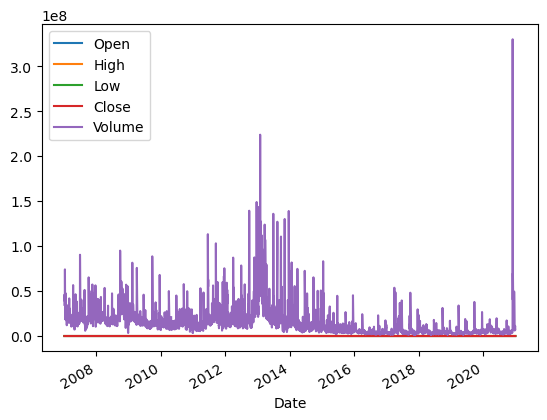

In [131]:
bb.plot()

<AxesSubplot:xlabel='Date'>

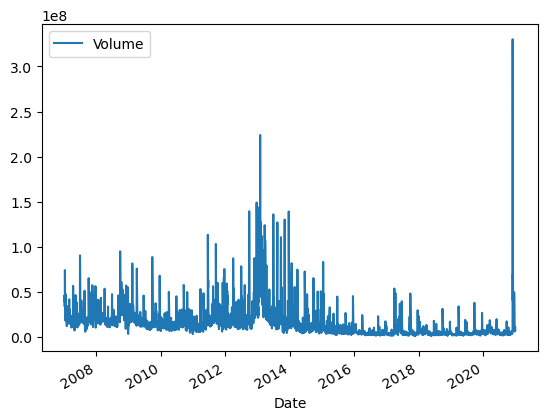

In [132]:
bb.plot(y='Volume')

<AxesSubplot:xlabel='Date'>

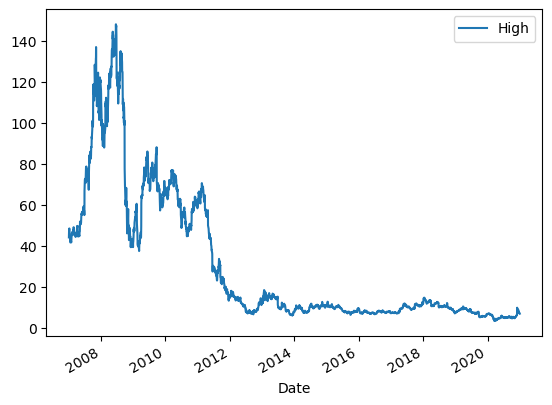

In [133]:
bb.plot(y='High')

<AxesSubplot:xlabel='Date'>

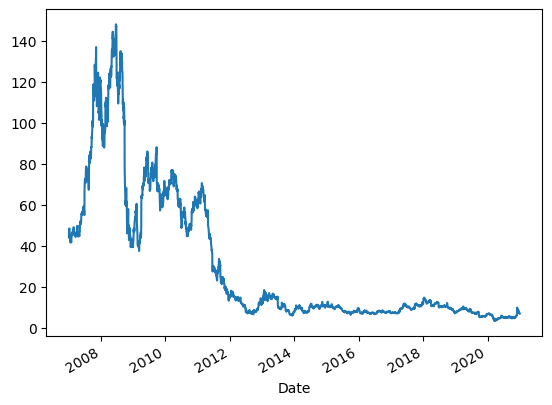

In [134]:
bb['High'].plot()

<AxesSubplot:xlabel='Date'>

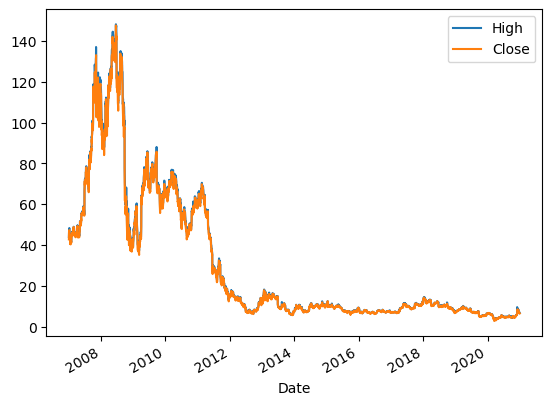

In [135]:
bb[['High', 'Close']].plot()

## customization

In [136]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [137]:
plt.style.use('dark_background')

<AxesSubplot:xlabel='Date'>

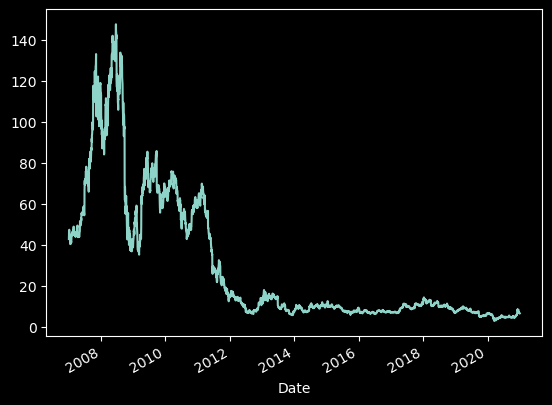

In [138]:
bb['Close'].plot()

<AxesSubplot:xlabel='Date'>

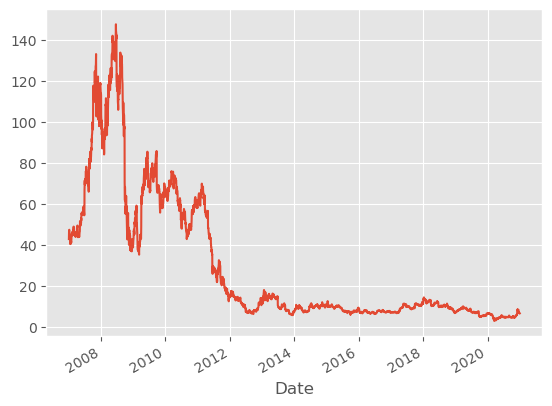

In [139]:
plt.style.use('ggplot')
bb['Close'].plot()

In [140]:
def rank_performance(stock_price):
    if stock_price <= 10:
        return 'Poor'
    elif stock_price <= 50:
        return 'Satisfactory'
    else:
        return 'Steller'

In [141]:
bb['Close'].apply(rank_performance).value_counts()

Poor            1541
Satisfactory    1125
Steller          859
Name: Close, dtype: int64

<AxesSubplot:>

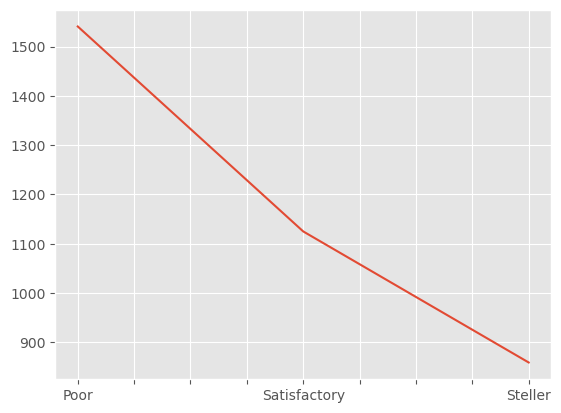

In [142]:
plt.style.use('ggplot')
bb['Close'].apply(rank_performance).value_counts().plot(kind='line') # kind= line default

<AxesSubplot:>

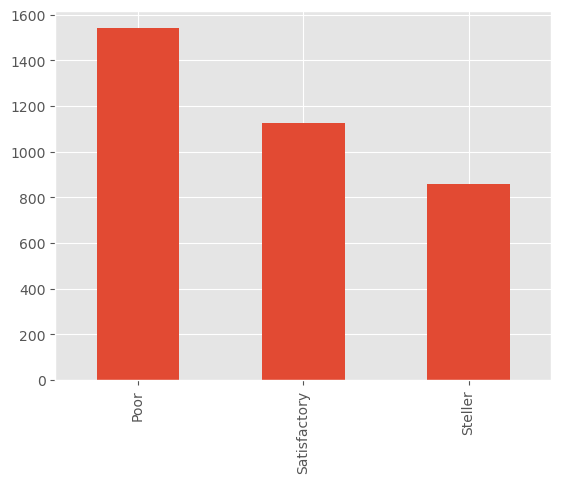

In [143]:
bb['Close'].apply(rank_performance).value_counts().plot(kind='bar')

<AxesSubplot:>

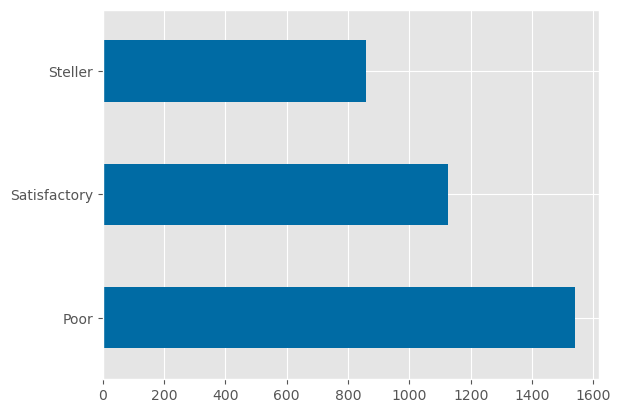

In [144]:
plt.style.use('tableau-colorblind10')
bb['Close'].apply(rank_performance).value_counts().plot(kind='barh')

<AxesSubplot:ylabel='Close'>

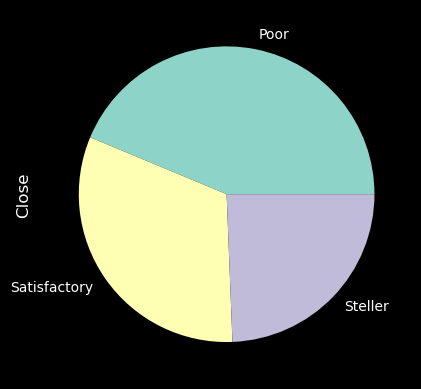

In [145]:
plt.style.use('dark_background')
bb['Close'].apply(rank_performance).value_counts().plot(kind='pie')

## options and settings module

In [146]:
import pandas as pd
import numpy as np

### changing options with attributes and dot syntax

In [147]:
data = np.random.randint(0, 100, [1000, 50])
df = pd.DataFrame(data)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,82,76,66,19,97,60,8,33,39,45,...,41,85,30,50,56,92,48,3,18,55
1,70,37,53,86,20,79,27,46,73,84,...,22,92,25,64,58,87,97,34,51,65


In [148]:
pd.options.display.max_rows

60

In [149]:
pd.options.display.max_rows = 4

In [150]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,82,76,66,19,97,60,8,33,39,45,...,41,85,30,50,56,92,48,3,18,55
1,70,37,53,86,20,79,27,46,73,84,...,22,92,25,64,58,87,97,34,51,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,9,19,28,91,70,22,77,98,48,71,...,52,89,14,64,71,1,55,34,81,63
999,25,77,66,73,41,49,91,50,33,88,...,52,53,21,99,52,21,86,34,21,82


In [151]:
pd.options.display.max_columns =46

In [152]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,...,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,82,76,66,19,97,60,8,33,39,45,63,3,4,96,81,90,73,60,66,72,78,73,48,...,95,99,78,25,41,96,32,51,42,12,49,88,47,41,85,30,50,56,92,48,3,18,55
1,70,37,53,86,20,79,27,46,73,84,4,35,78,91,10,70,30,57,92,1,37,22,90,...,18,38,23,25,76,95,41,54,41,89,91,53,1,22,92,25,64,58,87,97,34,51,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,9,19,28,91,70,22,77,98,48,71,44,24,39,23,46,45,10,74,22,18,3,76,65,...,39,74,91,77,46,85,85,85,66,99,11,31,75,52,89,14,64,71,1,55,34,81,63
999,25,77,66,73,41,49,91,50,33,88,22,60,54,21,98,87,51,35,10,51,52,10,24,...,69,42,2,3,41,68,41,66,29,4,50,11,34,52,53,21,99,52,21,86,34,21,82


### changing pandas options with methods

In [153]:
pd.get_option('max_rows')

OptionError: 'Pattern matched multiple keys'

In [154]:
pd.set_option('max_columns', 7)

OptionError: 'Pattern matched multiple keys'

In [155]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,...,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,82,76,66,19,97,60,8,33,39,45,63,3,4,96,81,90,73,60,66,72,78,73,48,...,95,99,78,25,41,96,32,51,42,12,49,88,47,41,85,30,50,56,92,48,3,18,55
1,70,37,53,86,20,79,27,46,73,84,4,35,78,91,10,70,30,57,92,1,37,22,90,...,18,38,23,25,76,95,41,54,41,89,91,53,1,22,92,25,64,58,87,97,34,51,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,9,19,28,91,70,22,77,98,48,71,44,24,39,23,46,45,10,74,22,18,3,76,65,...,39,74,91,77,46,85,85,85,66,99,11,31,75,52,89,14,64,71,1,55,34,81,63
999,25,77,66,73,41,49,91,50,33,88,22,60,54,21,98,87,51,35,10,51,52,10,24,...,69,42,2,3,41,68,41,66,29,4,50,11,34,52,53,21,99,52,21,86,34,21,82


In [156]:
pd.reset_option('max_rows')

In [157]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,...,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,82,76,66,19,97,60,8,33,39,45,63,3,4,96,81,90,73,60,66,72,78,73,48,...,95,99,78,25,41,96,32,51,42,12,49,88,47,41,85,30,50,56,92,48,3,18,55
1,70,37,53,86,20,79,27,46,73,84,4,35,78,91,10,70,30,57,92,1,37,22,90,...,18,38,23,25,76,95,41,54,41,89,91,53,1,22,92,25,64,58,87,97,34,51,65
2,78,4,96,48,23,24,57,9,22,15,60,80,78,61,90,6,91,61,73,86,39,56,0,...,31,45,67,12,25,19,0,70,44,76,44,37,41,28,81,5,63,97,85,16,68,40,52
3,67,55,72,49,59,53,63,85,90,20,79,72,59,70,51,83,59,63,87,53,35,34,87,...,94,8,21,94,63,44,2,63,2,60,39,70,21,30,55,10,57,97,56,73,16,88,18
4,33,9,61,36,60,80,56,68,13,97,84,60,19,47,45,30,5,33,9,15,69,86,10,...,41,59,24,75,98,7,77,4,98,1,32,27,21,81,15,30,17,1,71,90,80,13,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49,56,99,67,72,44,40,4,19,77,14,83,59,60,88,80,63,36,60,11,8,60,95,...,54,67,56,49,89,12,72,76,80,35,31,7,1,52,78,63,25,68,42,70,66,31,59
996,66,0,3,65,99,88,38,31,39,44,14,35,45,14,49,94,19,90,87,62,2,50,76,...,52,79,9,79,49,15,69,7,21,18,19,43,97,51,16,53,57,82,65,87,34,81,42
997,24,55,48,59,82,81,83,39,62,11,28,35,12,14,6,43,78,80,72,17,85,38,43,...,16,58,20,79,74,61,52,61,76,54,49,93,82,67,72,55,92,50,65,46,73,69,95
998,9,19,28,91,70,22,77,98,48,71,44,24,39,23,46,45,10,74,22,18,3,76,65,...,39,74,91,77,46,85,85,85,66,99,11,31,75,52,89,14,64,71,1,55,34,81,63


## precision option

In [158]:
# alters the number of digits that appears after the decimal points in a floating point number.
# It doesn't actually modify the number but hide the complexity 
# Temporary view of data

In [159]:
df = pd.DataFrame(np.random.randn(5,5))
df

,0,1,2,3,4
0,1.082897,1.636851,-2.130498,0.583366,-1.662951
1,0.597074,1.088702,0.246941,-0.991259,-0.784877
2,0.167365,0.710256,-0.100108,-1.232158,-1.211519
3,1.673699,-0.844388,0.822220,-0.112097,-2.432837
4,1.605887,-1.661402,-1.928791,-0.682431,-0.554296


In [170]:
pd.get_option('display.precision')

6

In [171]:
pd.set_option('display.precision', 2)
df

,0,1,2,3,4
0,1.08,1.64,-2.13,0.58,-1.66
1,0.60,1.09,0.25,-0.99,-0.78
2,0.17,0.71,-0.10,-1.23,-1.21
3,1.67,-0.84,0.82,-0.11,-2.43
4,1.61,-1.66,-1.93,-0.68,-0.55


In [172]:
pd.reset_option('display.precision')

In [174]:
df

,0,1,2,3,4
0,1.082897,1.636851,-2.130498,0.583366,-1.662951
1,0.597074,1.088702,0.246941,-0.991259,-0.784877
2,0.167365,0.710256,-0.100108,-1.232158,-1.211519
3,1.673699,-0.844388,0.822220,-0.112097,-2.432837
4,1.605887,-1.661402,-1.928791,-0.682431,-0.554296
